In [1]:
import rust_json_module
import glob

comment_files = glob.glob("./data/comments/*")
conversations_files = glob.glob("./data/conversations/*")
submissions_files = glob.glob("./data/submissions/*")


# List of JSON file paths
file_paths = comment_files + conversations_files + submissions_files

# Call the Rust function
topics = rust_json_module.process_files(file_paths)

# Access the results
for topic in topics:
    print(f"Topic: {topic.name}")
    print(f"Total References: {topic.total_references}")
    print("Supporting References per Date:")
    for date, count in topic.support_references_per_date.items():
        print(f"  {date}: {count}")
    print("Opposing References per Date:")
    for date, count in topic.oppose_references_per_date.items():
        print(f"  {date}: {count}")
    print("Neutral References per Date:")
    for date, count in topic.neutral_references_per_date.items():
        print(f"  {date}: {count}")

Topic: Israeli Incursions in Tulkarm (August 2023)
Total References: 165128
Supporting References per Date:
  2023-09-20: 39
  2023-11-21: 889
  2023-10-02: 24
  2023-10-10: 573
  2023-10-12: 790
  2023-10-22: 864
  2023-08-03: 33
  2023-08-07: 77
  2023-08-21: 18
  2023-11-02: 1008
  2023-11-19: 1204
  2023-11-29: 734
  2023-08-17: 36
  2023-09-13: 49
  2023-08-20: 46
  2023-11-03: 973
  2023-11-24: 805
  2023-09-17: 38
  2023-08-29: 2
  2023-08-18: 65
  2023-10-29: 1063
  2023-11-28: 810
  2023-09-19: 52
  2023-10-06: 60
  2023-08-13: 30
  2023-11-14: 1001
  2023-10-27: 964
  2023-11-22: 906
  2023-08-22: 4
  2023-10-03: 40
  2023-10-01: 18
  2023-08-06: 22
  2023-11-18: 1087
  2023-10-11: 664
  2023-09-30: 40
  2023-09-10: 42
  2023-10-17: 1168
  2023-11-13: 1032
  2023-10-05: 29
  2023-08-24: 2
  2023-08-09: 37
  2023-10-30: 1120
  2023-08-16: 72
  2023-08-02: 35
  2023-10-04: 39
  2023-10-18: 1321
  2023-09-09: 36
  2023-09-27: 40
  2023-08-19: 30
  2023-08-27: 4
  2023-09-14: 54


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dates = topics[0].support_references_per_date.keys()
total_posts_per_date = {}
for date in dates:
    posts_on_date = 0
    for topic in topics:
        if date in topic.neutral_references_per_date:
            posts_on_date += topic.neutral_references_per_date[date]
        if date in topic.oppose_references_per_date:
            posts_on_date += topic.oppose_references_per_date[date]
        if date in topic.support_references_per_date:
            posts_on_date += topic.support_references_per_date[date]
    total_posts_per_date[date] = posts_on_date

In [29]:
df

,Date,Support,Neutral,Oppose,Total_Posts
0,2023-08-01,216,503,931,8557.0
1,2023-08-02,396,1047,1132,13395.0
2,2023-08-03,371,940,1249,13387.0
3,2023-08-04,407,486,1230,11107.0
4,2023-08-05,249,517,1243,10823.0
...,...,...,...,...,...
117,2023-11-26,2131,4271,1615,51801.0
118,2023-11-27,2104,3867,1714,50091.0
119,2023-11-28,2427,3587,1646,49813.0
120,2023-11-29,2173,3977,1564,52710.0


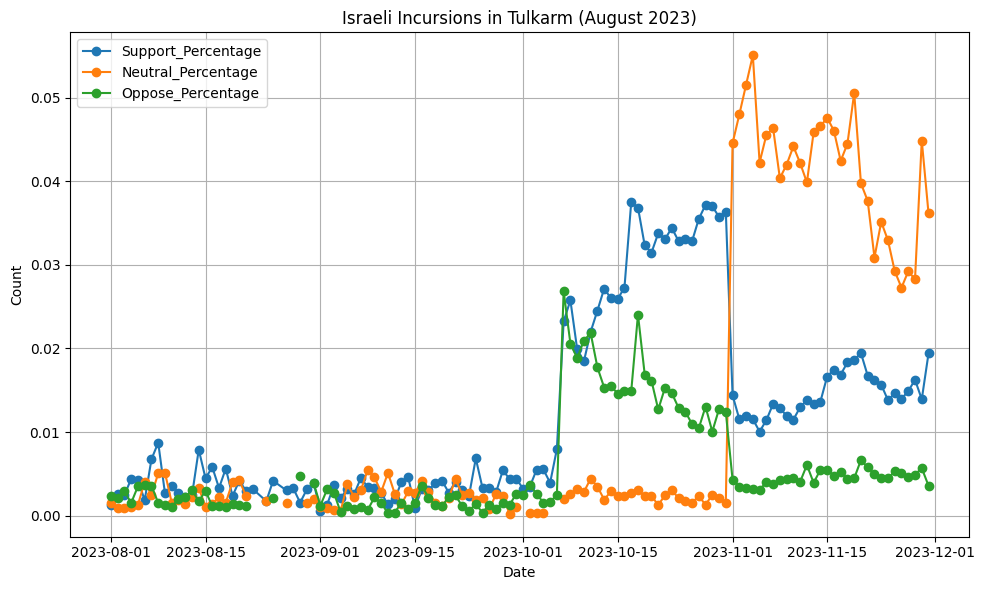

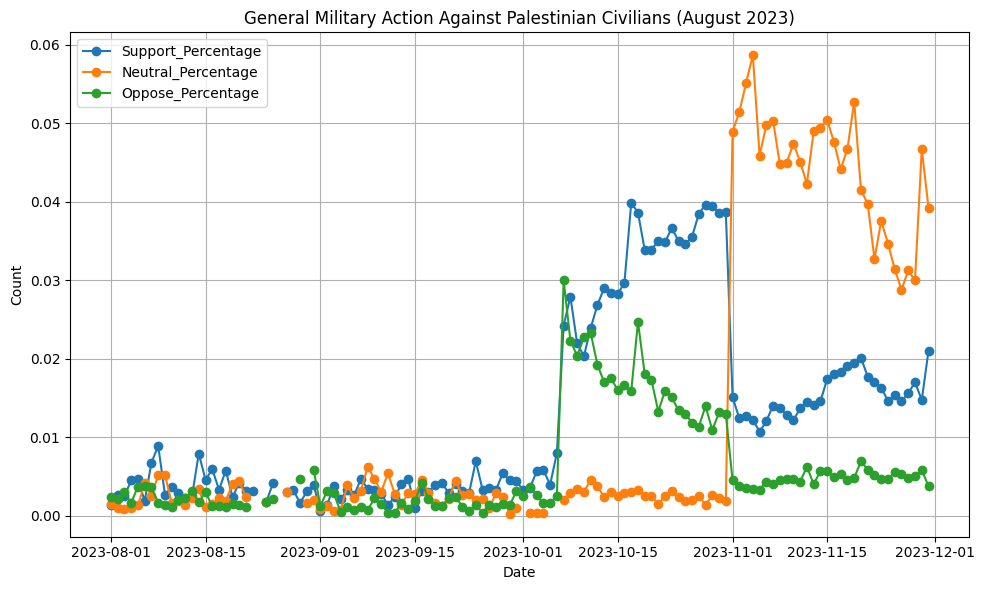

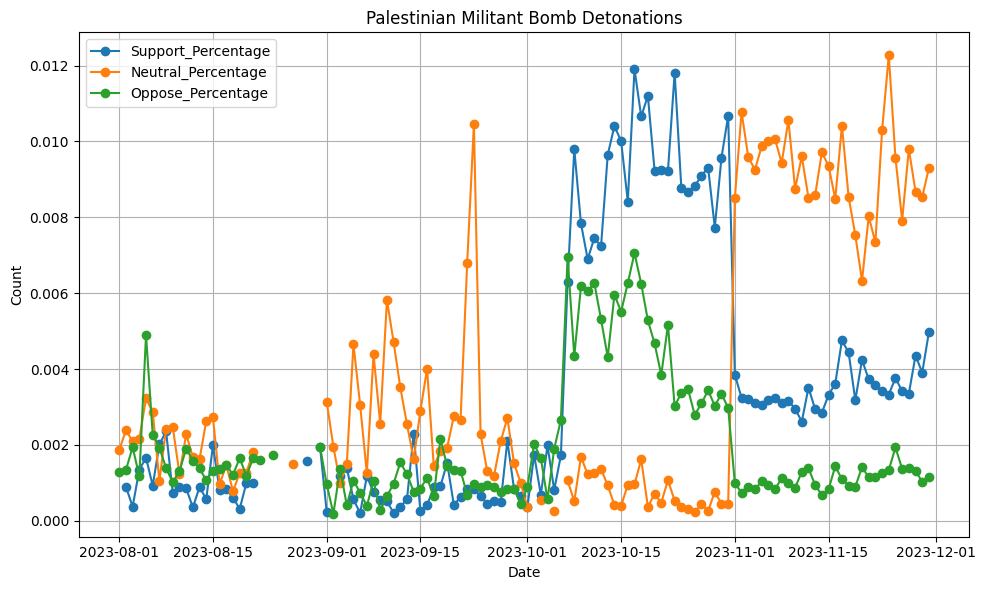

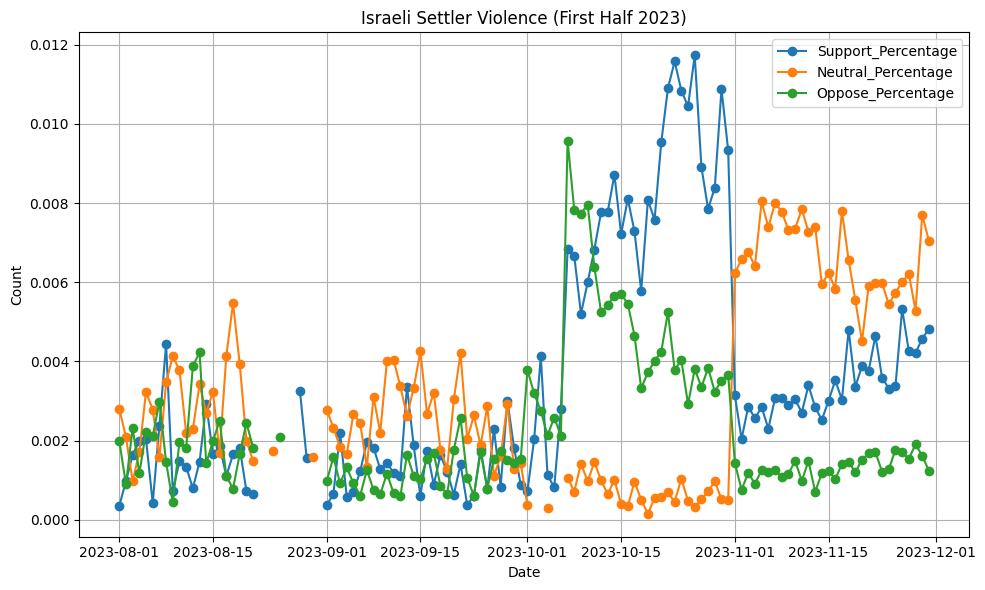

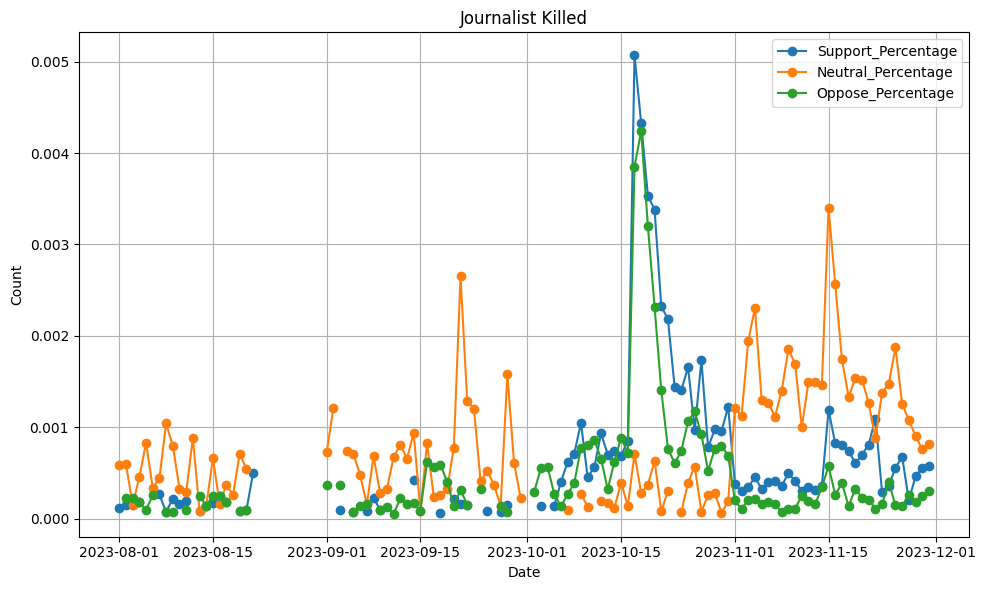

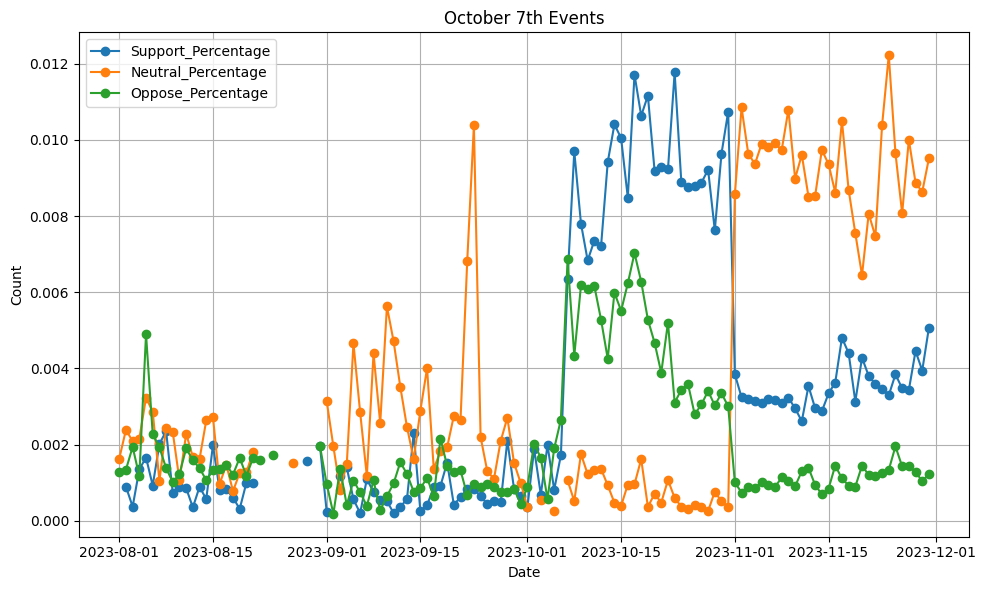

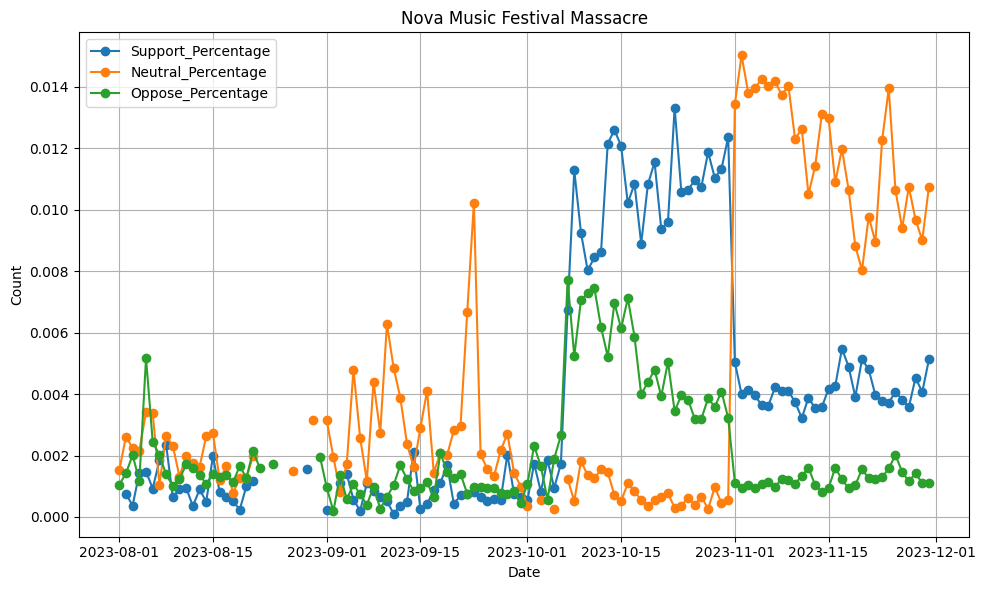

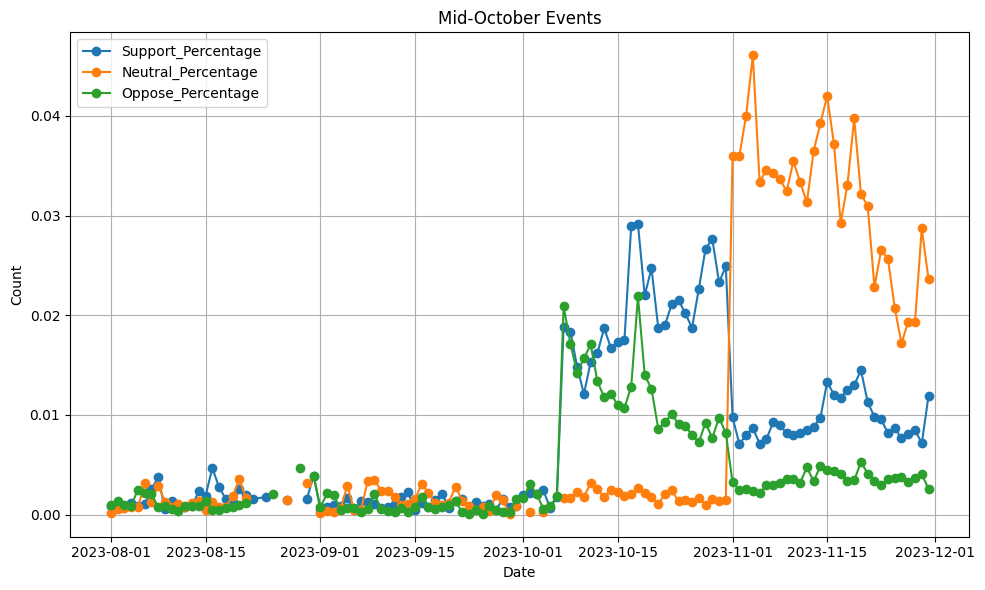

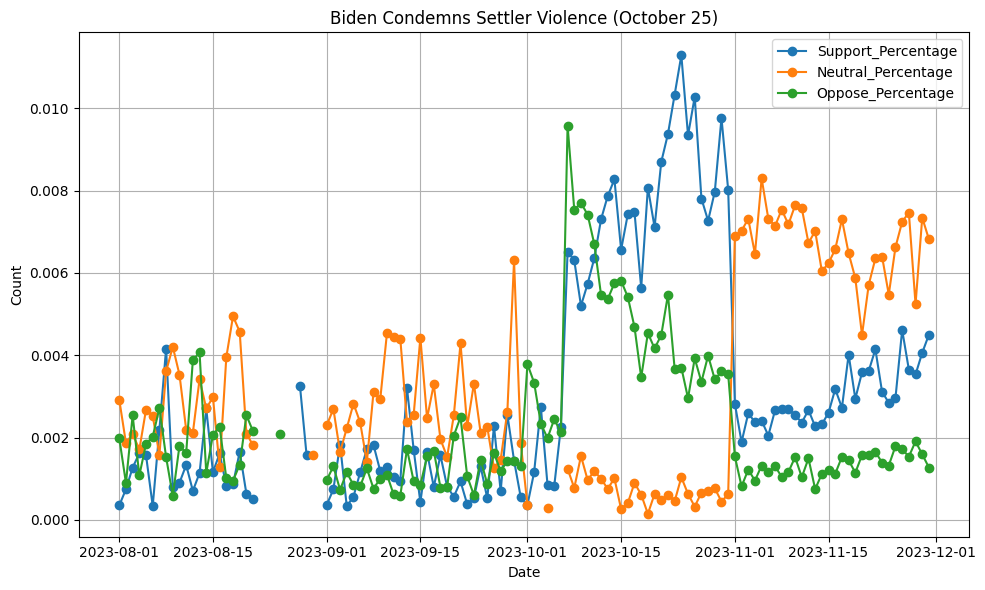

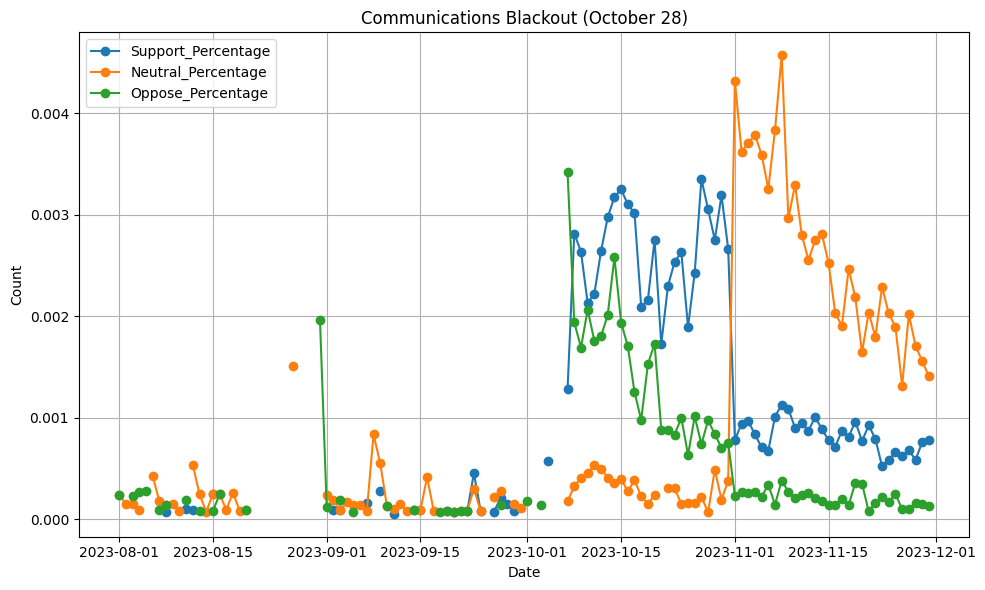

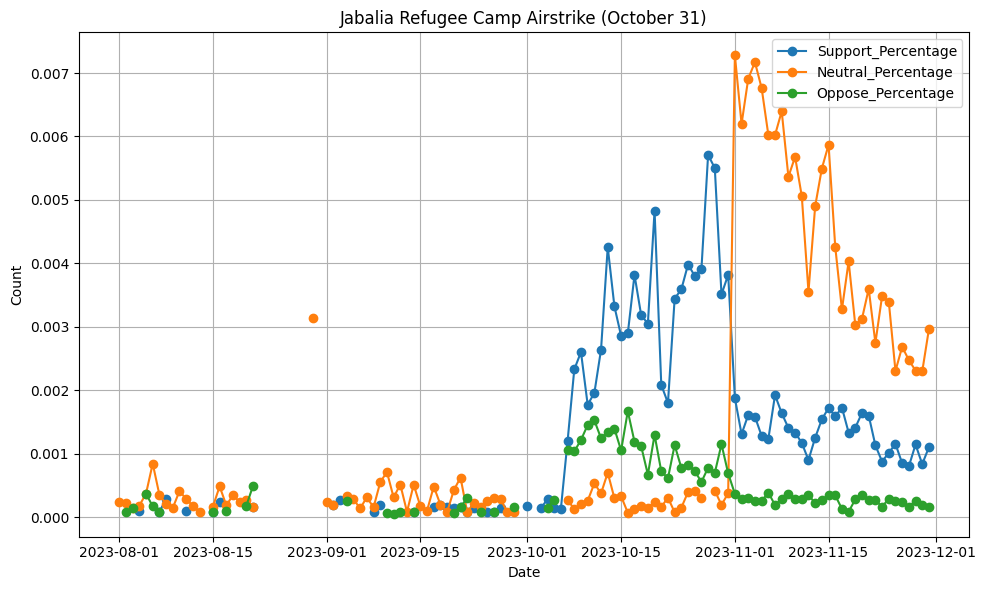

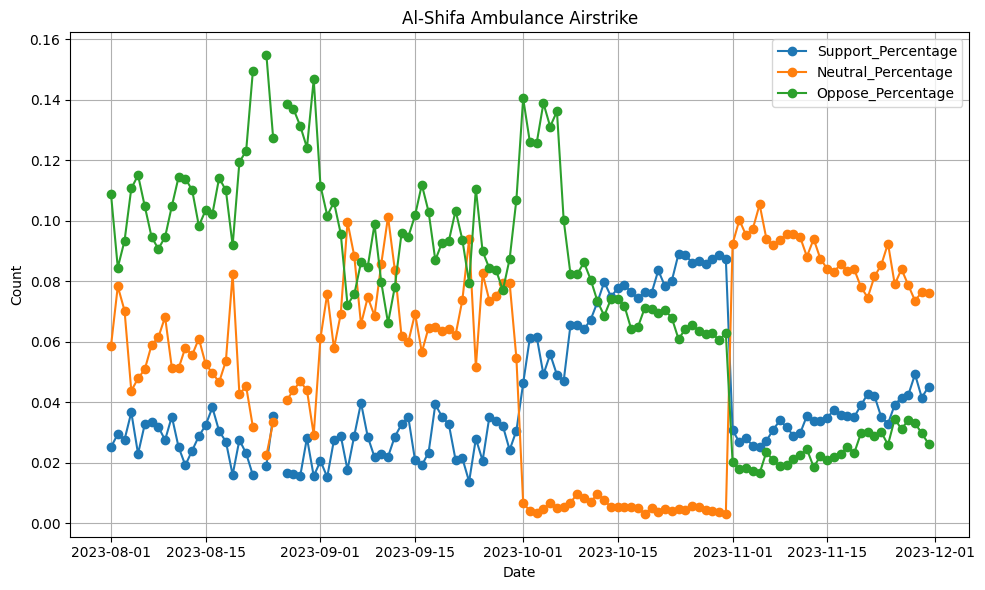

In [ ]:
for topic in topics:
    support = topic.support_references_per_date
    neutral = topic.neutral_references_per_date
    oppose = topic.oppose_references_per_date
    
    df_support = pd.DataFrame(list(support.items()), columns=['Date', 'Support'])
    df_neutral = pd.DataFrame(list(neutral.items()), columns=['Date', 'Neutral'])
    df_oppose = pd.DataFrame(list(oppose.items()), columns=['Date', 'Oppose'])
    df_total_posts = pd.DataFrame(list(total_posts_per_date.items()), columns=['Date', 'Total_Posts'])

    df = df_support.merge(df_neutral, on='Date', how='outer').merge(df_oppose, on='Date', how='outer').merge(df_total_posts, on='Date', how='outer')

    df["Support_Percentage"] = df["Support"] / df["Total_Posts"]
    df["Neutral_Percentage"] = df["Neutral"] / df["Total_Posts"]
    df["Oppose_Percentage"] = df["Oppose"] / df["Total_Posts"]

    df['Date'] = pd.to_datetime(df['Date'])

    plt.figure(figsize=(10, 6))
    # plt.plot(df['Date'], df['Support'], label='Support', marker='o')
    # plt.plot(df['Date'], df['Neutral'], label='Neutral', marker='o')
    # plt.plot(df['Date'], df['Oppose'], label='Oppose', marker='o')

    plt.plot(df['Date'], df['Support_Percentage'], label='Support_Percentage', marker='o')
    plt.plot(df['Date'], df['Neutral_Percentage'], label='Neutral_Percentage', marker='o')
    plt.plot(df['Date'], df['Oppose_Percentage'], label='Oppose_Percentage', marker='o')

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(topic.name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [5]:
df

,Date,Support,Neutral,Oppose
0,2023-08-01,216,503,931
1,2023-08-02,396,1047,1132
2,2023-08-03,371,940,1249
3,2023-08-04,407,486,1230
4,2023-08-05,249,517,1243
...,...,...,...,...
117,2023-11-26,2131,4271,1615
118,2023-11-27,2104,3867,1714
119,2023-11-28,2427,3587,1646
120,2023-11-29,2173,3977,1564


In [6]:
plt.plot(, label="Supporting", marker='o')


SyntaxError: invalid syntax (1664803486.py, line 1)

In [ ]:
for topic in topics.topics:
    df = prepare_topic_data(topic)
    plt.figure(figsize=(10, 6))
    plt.plot(df["date"], df["supporting"], label="Supporting", marker='o')
    plt.plot(df["date"], df["opposing"], label="Opposing", marker='x')
    plt.plot(df["date"], df["neutral"], label="Neutral", marker='s')
    
    plt.title(f"Topic: {topic.name}")
    plt.xlabel("Date")
    plt.ylabel("Number of References")
    plt.legend()
    plt.grid(True)
    plt.show()